<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Practice_eval_02_Question_1_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary libraries:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load the data:

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Practice-Evaluation-02/Office%20Dataset.csv')

# Checking the NULL values

In [15]:
null_counts = data.isnull().sum()
data_cleaned = data.dropna()
null_counts

Coffee_Consumption    0
Desk_Proximity        0
Hours_of_Sleep        0
Work_Output           0
dtype: int64

### 1.7.7.2 Define dependent (target) and independent (predictor) features

In [16]:
# Create the independent variable
X = data_cleaned[['Coffee_Consumption', 'Desk_Proximity', 'Hours_of_Sleep']]

# Create the dependent variable
y = data_cleaned['Work_Output']

### 1.7.7.3 Splitting Train and Test data

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Scaling for Multiple Linear Regression

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)


# Model Building and Training

## Training the model

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Predicting for Test Data

In [25]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
y_pred = model.predict((X_test_scaled))#ekhane 3 ta co efficient store korte hobe 3 ta variable e, then X_test_scaled e formula ta boshate hobe
print('y_pred:',y_pred)#ekhane y_pred

Intercept: 
 32.125
Coefficients: 
 [ 6.27056192 -0.48000983  0.25431806]
y_pred: [32.01088968 20.53588854 36.65689866 26.29152456 31.01592557]


# Model Evaluation

## Calculating Metrics

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE", mse)
print("R2", r2)

MSE 2.046170339630701
R2 0.9379195892102336


# Visualizing Predictions

## Visualize predicted vs. actual values

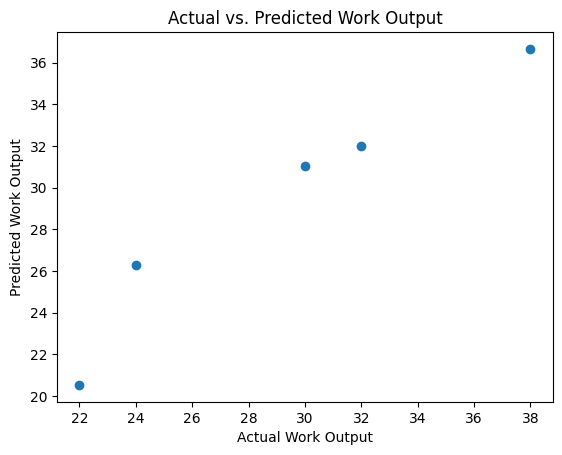

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Work Output')
plt.ylabel('Predicted Work Output')
plt.title('Actual vs. Predicted Work Output')
plt.show()